In [1]:
import pickle
import numpy as np
import pandas as pd
from plotting import *

def load_grid(filename):
    # grid_results: [gold_agreement, expected_agreement, sampled_agreement, no_possible_coaltions, entropy]
    E = 12
    grid_results = None
    with open('model_runs/debugging/' + filename + '.pickle', 'rb') as handle:
        grid_results = pickle.load(handle)

    avg_gold_regrets = [None] * E
    avg_expected_regrets = [None] * E
    avg_sampled_regrets = [None] * E
    avg_possible_coalitions = [None] * E
    avg_entropies = [None] * E
    normalized_expected_regrets = [None] * E
    normalized_sampled_regrets = [None] * E
    expected_regrets_std = [None] * E
    sampled_regrets_std = [None] * E

    labels = [n for n in range(E)]

    no_results = len(grid_results)
    print("Results in grid: ", no_results)
    print("Values per experiment: ",  int(no_results / E))

    for e in range(E):          
        gold_regrets = [None] * int(no_results / E)
        expected_regrets = [None] * int(no_results / E)
        sampled_regrets = [None] * int(no_results / E)
        no_possible_coalitions = [None] * int(no_results / E)
        entropies = [None] * int(no_results / E)

        for i, index in enumerate(range(e, len(grid_results), E)):
            gold_regrets[i], expected_regrets[i], sampled_regrets[i], no_possible_coalitions[i], entropies[i] = grid_results[index]

        avg_gold_regrets[e] = np.sum(gold_regrets) / len(gold_regrets)

        avg_expected_regrets[e] = np.sum(expected_regrets) / len(expected_regrets)

        avg_sampled_regrets[e] = np.sum(sampled_regrets) / len(sampled_regrets)

        avg_possible_coalitions[e] = np.sum(no_possible_coalitions) / len(no_possible_coalitions)

        avg_entropies[e] = np.sum(entropies) / len(entropies)

        normalized_expected_regrets[e] = avg_expected_regrets[e] / avg_gold_regrets[e]
        normalized_sampled_regrets[e] = avg_sampled_regrets[e] / avg_gold_regrets[e]

        expected_regrets_std[e] = np.std(expected_regrets)
        sampled_regrets_std[e] = np.std(sampled_regrets)
        
    return [avg_gold_regrets, avg_expected_regrets, avg_sampled_regrets, avg_possible_coalitions, 
            avg_entropies, normalized_expected_regrets, normalized_sampled_regrets, expected_regrets_std, 
            sampled_regrets_std, [n for n in range(E)]]

In [2]:
file = "4-5-1000-A-1000"

grid_4_5_1000_A_1000 = load_grid(file)
labels = grid_4_5_1000_A_1000[9]
# e = 0: no breaking points
# e = 1: one random breaking point for the largest party
# e = 2: one breaking point on the top issue of the largest party
# e = 3: one random breaking point for the largest two parties
# e = 4: one breaking point on the top issues of the two largest party
# e = 5: one random breaking point per party
# e = 6: one top issue breaking point per party
# e = 7: two random breaking points per party
# e = 8: two top issue breaking points per party
# e = 9: one random breaking point for the smallest party
# e = 10: one breaking point on the top issue of the smallest party
# e = 11: one breaking point on the top issue of the first party + vote revaluation

# grid[0] = avg_gold_regrets
# grid[1] = avg_expected_regrets
# gird[2] = avg_sampled_regrets
# grid[3] = avg_possible_coalitions
# grid[4] = avg_entropies
# grid[5] = normalized_expected_regrets
# grid[6] = normalized_sampled_regrets
# grid[7] = expected_regrets_std
# grid[8] = sampled_regrets_std
# grid[9] = labels

Results in grid:  12000
Values per experiment:  1000


# Agreement Rates & Normalization

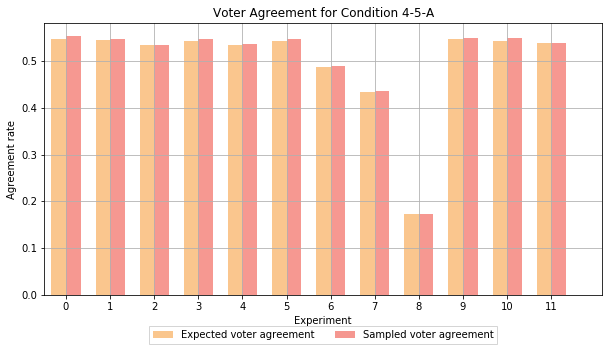

In [3]:
title = "Voter Agreement for Condition 4-5-A"
xlabel = "Experiment"
xticklabels = labels
ylabel = "Agreement rate"
legend = ["Expected voter agreement", "Sampled voter agreement"]
colours = ['#F78F1E', '#EE3224', '#FFC222']
name = "graphs/agreement_4-5-A.png"

data = pd.DataFrame([grid_4_5_1000_A_1000[1], grid_4_5_1000_A_1000[2]]).T
plot_bar_chart_2(data, title, xlabel, xticklabels, ylabel, legend, colours, name)

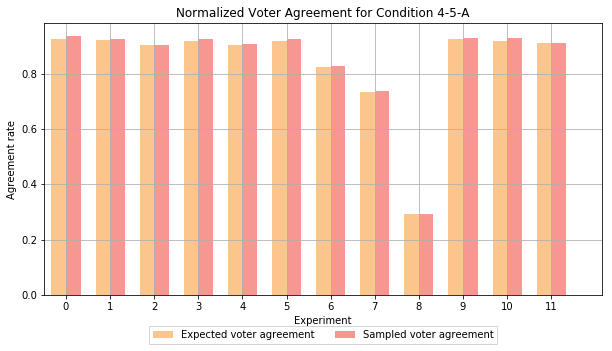

In [4]:
title = "Normalized Voter Agreement for Condition 4-5-A"
xlabel = "Experiment"
xticklabels = labels
ylabel = "Agreement rate"
legend = ["Expected voter agreement", "Sampled voter agreement"]
colours = ['#F78F1E', '#EE3224', '#FFC222']
name = "graphs/norm_agreement_4-5-A.png"

data = pd.DataFrame([grid_4_5_1000_A_1000[5], grid_4_5_1000_A_1000[6]]).T
plot_bar_chart_2(data, title, xlabel, xticklabels, ylabel, legend, colours, name)

# Standard Deviation

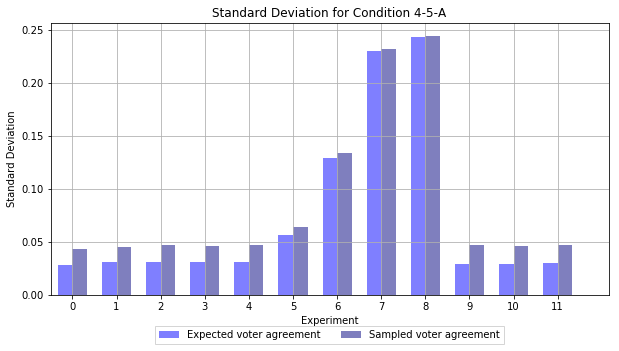

In [5]:
title = "Standard Deviation for Condition 4-5-A"
xlabel = "Experiment"
xticklabels = labels
ylabel = "Standard Deviation"
legend = ["Expected voter agreement", "Sampled voter agreement"]
colours = ['#0000FF', '#00007F']
name = "graphs/stds_4-5-A.png"

data = pd.DataFrame([grid_4_5_1000_A_1000[7], grid_4_5_1000_A_1000[8]]).T
plot_bar_chart_2(data, title, xlabel, xticklabels, ylabel, legend, colours, name)

# Number of possible coalitions

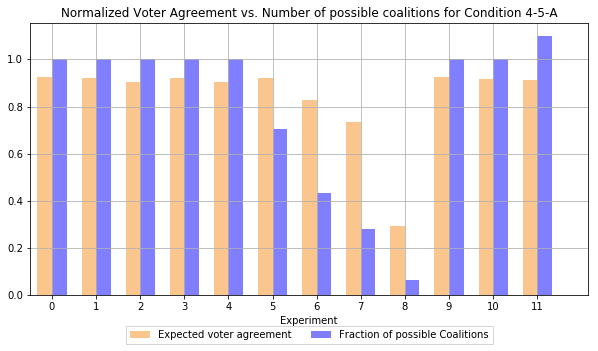

In [6]:
title = "Normalized Voter Agreement vs. Number of possible coalitions for Condition 4-5-A"
xlabel = "Experiment"
xticklabels = labels
ylabel = ""
legend = ["Expected voter agreement", "Fraction of possible Coalitions"]
colours = ['#F78F1E', '#0000FF', '#FFC222']
name = "graphs/coalitions_4-5-A.png"

avg_possible_coalitions_norm = np.array(grid_4_5_1000_A_1000[3])/6

data = pd.DataFrame([grid_4_5_1000_A_1000[5], list(avg_possible_coalitions_norm)]).T
plot_bar_chart_2(data, title, xlabel, xticklabels, ylabel, legend, colours, name)

# Entropy

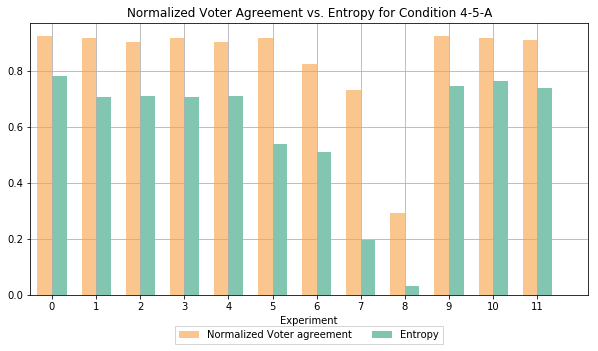

In [7]:
title = "Normalized Voter Agreement vs. Entropy for Condition 4-5-A"
xlabel = "Experiment"
xticklabels = labels
ylabel = ""
legend = ["Normalized Voter agreement", "Entropy", "Fraction of possible Coalitions"]
colours = ['#F78F1E', '#078C62', '#0000FF']
name = "graphs/entropy_4-5-A.png"

data = pd.DataFrame([grid_4_5_1000_A_1000[5], grid_4_5_1000_A_1000[4]]).T
plot_bar_chart_2(data, title, xlabel, xticklabels, ylabel, legend, colours, name)

# Comparing standard and extreme weighted distributions

In [8]:
grid_4_5_1000_B_1000 = load_grid('4-5-1000-B-1000')

Results in grid:  12000
Values per experiment:  1000


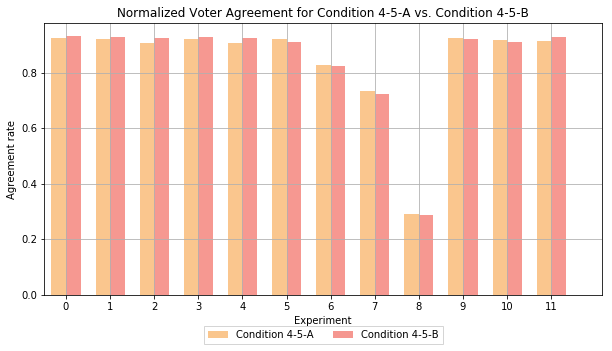

In [9]:
title = "Normalized Voter Agreement for Condition 4-5-A vs. Condition 4-5-B"
xlabel = "Experiment"
xticklabels = labels
ylabel = "Agreement rate"
legend = ["Condition 4-5-A", "Condition 4-5-B"]
colours = ['#F78F1E', '#EE3224', '#FFC222']
name = "graphs/agreement_A-B.png"

data = pd.DataFrame([grid_4_5_1000_A_1000[5], grid_4_5_1000_B_1000[5]]).T
plot_bar_chart_2(data, title, xlabel, xticklabels, ylabel, legend, colours, name)

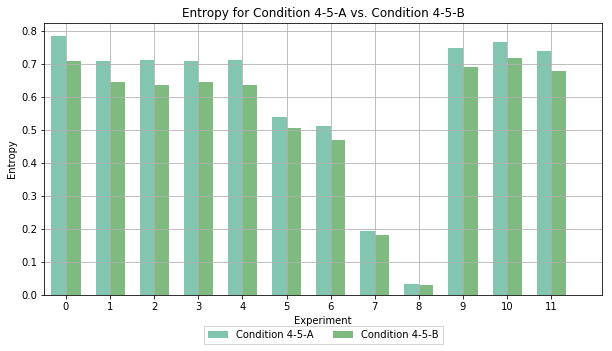

In [10]:
title = "Entropy for Condition 4-5-A vs. Condition 4-5-B"
xlabel = "Experiment"
xticklabels = labels
ylabel = "Entropy"
legend = ["Condition 4-5-A", "Condition 4-5-B", "Fraction of possible Coalitions"]
colours = ['#078C62', '#007802', '#0000FF']
name = "graphs/entropy_A-B.png"

data = pd.DataFrame([grid_4_5_1000_A_1000[4], grid_4_5_1000_B_1000[4]]).T
plot_bar_chart_2(data, title, xlabel, xticklabels, ylabel, legend, colours, name)

# More Issues for 4 parties

In [11]:
grid_4_10_1000_A_1000 = load_grid('4-10-1000-A-1000')
grid_4_20_1000_A_1000 = load_grid('4-20-1000-A-1000')

Results in grid:  12000
Values per experiment:  1000
Results in grid:  12000
Values per experiment:  1000


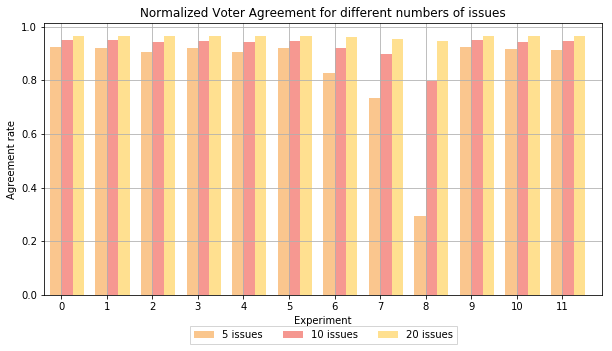

In [12]:
title = "Normalized Voter Agreement for different numbers of issues"
xlabel = "Experiment"
xticklabels = labels
ylabel = "Agreement rate"
legend = ["5 issues", "10 issues", "20 issues"]
colours = ['#F78F1E', '#EE3224', '#FFC222']
name = "graphs/agreement4_5-10-20.png"

data = pd.DataFrame([grid_4_5_1000_A_1000[5], grid_4_10_1000_A_1000[5], grid_4_20_1000_A_1000[5]]).T
plot_bar_chart_3(data, title, xlabel, xticklabels, ylabel, legend, colours, name)

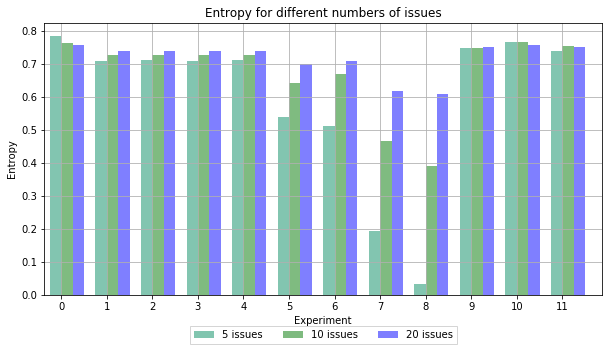

In [13]:
title = "Entropy for different numbers of issues"
xlabel = "Experiment"
xticklabels = labels
ylabel = "Entropy"
legend = ["5 issues", "10 issues", "20 issues"]
colours = ['#078C62', '#007802', '#0000FF']
name = "graphs/entropy4_5-10-20.png"

data = pd.DataFrame([grid_4_5_1000_A_1000[4], grid_4_10_1000_A_1000[4], grid_4_20_1000_A_1000[4]]).T
plot_bar_chart_3(data, title, xlabel, xticklabels, ylabel, legend, colours, name)

# More parties with 5 issues

In [14]:
grid_6_5_1000_A_1000 = load_grid('6-5-1000-A-1000')
grid_10_5_1000_A_1000 = load_grid('10-5-1000-A-1000')

Results in grid:  12000
Values per experiment:  1000
Results in grid:  12000
Values per experiment:  1000


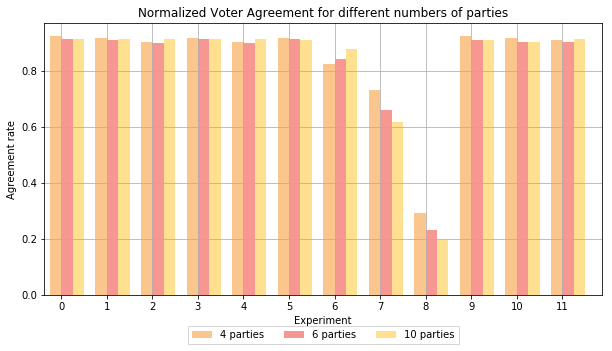

In [15]:
title = "Normalized Voter Agreement for different numbers of parties"
xlabel = "Experiment"
xticklabels = labels
ylabel = "Agreement rate"
legend = ["4 parties", "6 parties", "10 parties"]
colours = ['#F78F1E', '#EE3224', '#FFC222']
name = "graphs/agreement5_4-6-10.png"

data = pd.DataFrame([grid_4_5_1000_A_1000[5], grid_6_5_1000_A_1000[5], grid_10_5_1000_A_1000[5]]).T
plot_bar_chart_3(data, title, xlabel, xticklabels, ylabel, legend, colours, name)

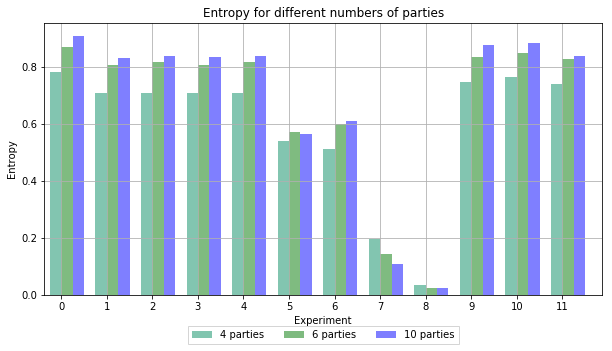

In [16]:
title = "Entropy for different numbers of parties"
xlabel = "Experiment"
xticklabels = labels
ylabel = "Entropy"
legend = ["4 parties", "6 parties", "10 parties"]
colours = ['#078C62', '#007802', '#0000FF']
name = "graphs/entropy5_4-6-10.png"

data = pd.DataFrame([grid_4_5_1000_A_1000[4], grid_6_5_1000_A_1000[4], grid_10_5_1000_A_1000[4]]).T
plot_bar_chart_3(data, title, xlabel, xticklabels, ylabel, legend, colours, name)

# Extreme Case: 10 parties and 20 issues

In [17]:
grid_10_20_1000_A_1000 = load_grid('10-20-1000-A-1000')

Results in grid:  12000
Values per experiment:  1000


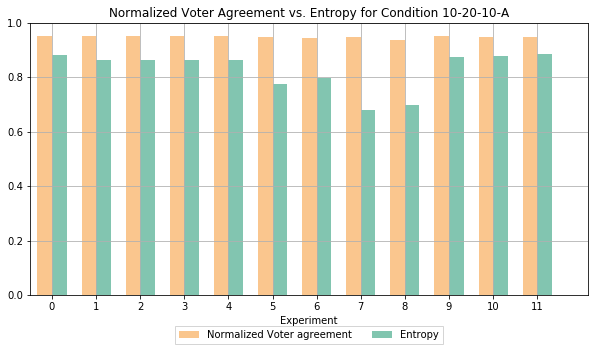

In [18]:
title = "Normalized Voter Agreement vs. Entropy for Condition 10-20-10-A"
xlabel = "Experiment"
xticklabels = labels
ylabel = ""
legend = ["Normalized Voter agreement", "Entropy", "Fraction of possible Coalitions"]
colours = ['#F78F1E', '#078C62', '#0000FF']
name = "graphs/entropy_10-20-A.png"

data = pd.DataFrame([grid_10_20_1000_A_1000[5], grid_10_20_1000_A_1000[4]]).T
plot_bar_chart_2(data, title, xlabel, xticklabels, ylabel, legend, colours, name)